<a href="https://colab.research.google.com/github/icey6Lulu/InteractiveDataBase/blob/main/RefineInteractive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tools
import pandas as pd
import sys, os
sys.path.append('./VisualFeatureSearch')
from vissearch import widgets, util, data
import numpy as np
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt
import torch
from torchvision import transforms, utils

Random number generated: 104
Image path: ILSVRC2012_val_00000105.JPEG
Image label:201


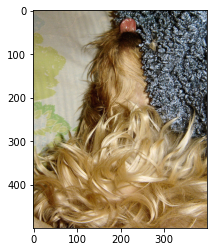

Image classification:  'silky terrier, Sydney silky'


In [2]:
image, label = tools.load_random_image()
# print(image)
lable_name = pd.read_csv('val_250/lables.txt', sep = ':')
class_names = []
for i in range(1000):
    class_names.append(lable_name.iloc[i-1, 1].rstrip(","))

print('Image classification: {}'.format(class_names[label]))
#print('Image label:{}'.format(label))

In [3]:
convert_tensor = transforms.ToTensor()

size = (224, 224)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

transform = transforms.Compose([
    transforms.Resize(size),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std) # (x - mean) / std
])

query_vis_transform = transforms.Compose([
    transforms.CenterCrop((256,256)),
    transforms.Resize((224,224))
])

query_model_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

query_img = query_vis_transform(image)
# convert images to Data URLs so we can pass them into the HTML widget
query_img_url = util.image_to_durl(query_img)


highlight_data = None
highlight_index = None
def highlight_callback(data):
    global highlight_data
    highlight_data = data 
util.create_callback('highlight_callback', highlight_callback)

widgets.HighlightWidget(query_img_url, callback_name='highlight_callback')

Using cache found in /Users/iceyai/.cache/torch/hub/pytorch_vision_v0.10.0
/Users/iceyai/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Original image classification:  'silky terrier, Sydney silky'


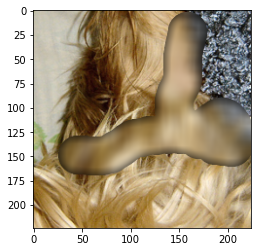

Class #1 -  'maillot, tank suit' - Logit: 8.13 - Softmax: 15.12%
Class #2 -  'maillot' - Logit: 7.77 - Softmax: 10.54%
Class #3 -  'Band Aid' - Logit: 7.09 - Softmax: 5.35%
Class #4 -  'nipple' - Logit: 7.03 - Softmax: 5.03%
Class #5 -  'brassiere, bra, bandeau' - Logit: 6.83 - Softmax: 4.09%


/Users/iceyai/Documents/GitHub/InteractiveDataBase/tools.py:150: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  y_softmax = softmax(y_output)


In [6]:
mask = util.durl_to_image(highlight_data)
mask_arr = np.asarray(mask)[:,:,3] / 256 # take just the alpha channel

model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', weights=True)
model.eval()

img_input = tools.img_transform(query_img)
mask_input = tools.mask_transform(mask_arr)
print('Original image classification: {}'.format(class_names[label]))
tools.score_gen_csv(tools.transform_Noise, img_input, mask_input, model)